# Homework 2

Before everything, I import the dataset 'auto-mpg.data'
<br>
Then delete all rows which contain missing data '?'
<br>
And convert all values in 'horsepower' from string to numeric type.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
# Drop rows with '?' in the horsepower column
df.drop(df[df['horsepower']=='?'].index,inplace=True)

In [3]:
# Convert all values in the horsepower column from string to numeric type.
df['horsepower'] = pd.to_numeric(df['horsepower'])

### Problem 1
### Part a

Firstly，dividing the dataset into independent variables X_var and dependent variable Y_var.
<br>
Then, split the dataset to training set and testing set. 70% training set; 30% testing set.
<br>
&emsp; Training set is used to train our regression model;
<br>
&emsp; Testing set is used to test how good our regression model fit to make a prediction.

In [4]:
from sklearn.model_selection import train_test_split

X_var = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin']]
Y_var = df['weight']

x_train,x_test,y_train,y_test = train_test_split(X_var, Y_var, test_size=0.3)

### Problem 1
### Part b & Part c

This part combines the answers to parts b and c. 
<br>
Because the results of part b are long lists of float numbers, so they are not printed out.
<br>
&emsp; All my results of part b are stored in lists named pred_0, pred_1, pred_2, and pred_3. 
<br>
&emsp; These are weight features regressed by my linear regression model.
<br>
<br>
And all the Mean squared error (MSE) of the training and testing set are printed out accordingly.
<br>
&emsp; The output MSE are all large numbers. I think this perhaps because:
<br>
&emsp; 1. Residual Error was not counted.
<br>
&emsp; 2. Datapoints are too fragmented, we need a higher degree model to fit the data.

Below is about training set:

In [5]:
print("Training Set")

Y_train = np.array(y_train)

for i in x_train:
    X_train_i = np.array(x_train[i])
    
    print("    independent feature is: ", i)
    
    pred_0 = []
    pred_1 = []
    pred_2 = []
    pred_3 = []
    for j in range(len(X_train_i)):
    
        # order = 0
        X = np.c_[np.ones(len(X_train_i))]
        w_0 = X.T@Y_train@np.linalg.inv(X.T@X)
        pred = w_0[0]
        pred_0.append(pred)
    
        # order = 1
        X = np.c_[np.ones(len(X_train_i)), X_train_i]
        w_1 = X.T@Y_train@np.linalg.inv(X.T@X)
        pred = w_1[0] + w_1[1]*X_train_i[j]
        pred_1.append(pred)
        
        # order = 2
        X = np.c_[np.ones(len(X_train_i)), X_train_i, np.square(X_train_i)]
        w_2 = X.T@Y_train@np.linalg.inv(X.T@X)
        pred = w_2[0] + w_2[1]*X_train_i[j] + w_2[2]*np.square(X_train_i[j])
        pred_2.append(pred)
        
        # order = 3
        X = np.c_[np.ones(len(X_train_i)), X_train_i, np.square(X_train_i), np.power(X_train_i,3)]
        w_3 = X.T@Y_train@np.linalg.inv(X.T@X)
        pred = w_3[0] + w_3[1]*X_train_i[j] + w_3[2]*np.square(X_train_i[j]) + w_3[3]*np.power(X_train_i[j], 3)
        pred_3.append(pred)
    
    sum_0 = 0
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    for k in range(len(Y_train)):
        sum_0 += (Y_train[k]-pred_0[k])**2
        sum_1 += (Y_train[k]-pred_1[k])**2
        sum_2 += (Y_train[k]-pred_2[k])**2
        sum_3 += (Y_train[k]-pred_3[k])**2
    mse_0 = sum_0/len(Y_train)
    mse_1 = sum_1/len(Y_train)
    mse_2 = sum_2/len(Y_train)
    mse_3 = sum_3/len(Y_train)
    
    print("        order = 0, MSE =", mse_0)
    print("        order = 1, MSE =", mse_1)
    print("        order = 2, MSE =", mse_2)
    print("        order = 3, MSE =", mse_3)

Training Set
    independent feature is:  mpg
        order = 0, MSE = 720492.1145639085
        order = 1, MSE = 223192.89147924742
        order = 2, MSE = 147550.44195083604
        order = 3, MSE = 146527.7276393977
    independent feature is:  cylinders
        order = 0, MSE = 720492.1145639085
        order = 1, MSE = 146664.15418013468
        order = 2, MSE = 146662.23958706151
        order = 3, MSE = 145467.8991441349
    independent feature is:  displacement
        order = 0, MSE = 720492.1145639085
        order = 1, MSE = 100619.16971350509
        order = 2, MSE = 88396.27939690548
        order = 3, MSE = 87976.06970957879
    independent feature is:  horsepower
        order = 0, MSE = 720492.1145639085
        order = 1, MSE = 187481.58687629507
        order = 2, MSE = 158120.4832553597
        order = 3, MSE = 152268.90241361354
    independent feature is:  acceleration
        order = 0, MSE = 720492.1145639085
        order = 1, MSE = 581107.0711193774
        or

Below is about testing set:

In [6]:
print("Testing Set")

Y_test = np.array(y_test)

for i in x_test:
    X_test_i = np.array(x_test[i])
    
    print("    independent feature is: ", i)
    
    pred_0 = []
    pred_1 = []
    pred_2 = []
    pred_3 = []
    for j in range(len(X_test_i)):
    
        # order = 0
        X = np.c_[np.ones(len(X_test_i))]
        w_0 = X.T@Y_test@np.linalg.inv(X.T@X)
        pred = w_0[0]
        pred_0.append(pred)
    
        # order = 1
        X = np.c_[np.ones(len(X_test_i)), X_test_i]
        w_1 = X.T@Y_test@np.linalg.inv(X.T@X)
        pred = w_1[0] + w_1[1]*X_test_i[j]
        pred_1.append(pred)
        
        # order = 2
        X = np.c_[np.ones(len(X_test_i)), X_test_i, np.square(X_test_i)]
        w_2 = X.T@Y_test@np.linalg.inv(X.T@X)
        pred = w_2[0] + w_2[1]*X_test_i[j] + w_2[2]*np.square(X_test_i[j])
        pred_2.append(pred)
        
        # order = 3
        X = np.c_[np.ones(len(X_test_i)), X_test_i, np.square(X_test_i), np.power(X_test_i, 3)]
        w_3 = X.T@Y_test@np.linalg.inv(X.T@X)
        pred = w_3[0] + w_3[1]*X_test_i[j] + w_3[2]*np.square(X_test_i[j]) + w_3[3]*np.power(X_test_i[j], 3)
        pred_3.append(pred)
    
    sum_0 = 0
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    for k in range(len(Y_test)):
        sum_0 += (Y_test[k]-pred_0[k])**2
        sum_1 += (Y_test[k]-pred_1[k])**2
        sum_2 += (Y_test[k]-pred_2[k])**2
        sum_3 += (Y_test[k]-pred_3[k])**2
    mse_0 = sum_0/len(Y_test)
    mse_1 = sum_1/len(Y_test)
    mse_2 = sum_2/len(Y_test)
    mse_3 = sum_3/len(Y_test)
    
    print("        order = 0, MSE =", mse_0)
    print("        order = 1, MSE =", mse_1)
    print("        order = 2, MSE =", mse_2)
    print("        order = 3, MSE =", mse_3)

Testing Set
    independent feature is:  mpg
        order = 0, MSE = 715314.9310542949
        order = 1, MSE = 216074.97531850458
        order = 2, MSE = 139679.1305593611
        order = 3, MSE = 138190.2848771383
    independent feature is:  cylinders
        order = 0, MSE = 715314.9310542949
        order = 1, MSE = 122987.2115566288
        order = 2, MSE = 119662.7787955841
        order = 3, MSE = 112298.79818705273
    independent feature is:  displacement
        order = 0, MSE = 715314.9310542949
        order = 1, MSE = 75659.47647226274
        order = 2, MSE = 73712.5735854803
        order = 3, MSE = 72991.43644869748
    independent feature is:  horsepower
        order = 0, MSE = 715314.9310542949
        order = 1, MSE = 164849.34404908
        order = 2, MSE = 150949.6807070408
        order = 3, MSE = 143347.00431161452
    independent feature is:  acceleration
        order = 0, MSE = 715314.9310542949
        order = 1, MSE = 619203.1154462458
        order = 2,

### Problem 1
### Part d

Plot the result form part b and part c. 
<br>
Each graph contains a feature's datapoints, and four lines (Red-degree0;Yellow-degree1;Green-degree2;Blue-degree3).
<br>
The y-axis is 'weight'; the x-axis is the corresponding independent variable:
<br>
&emsp; 'mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin'

Orders form 0 to 2 are obviously underfitting to the test set.
<br>
Therefore, order = 3 best fits the test set. 
<br>
I also think higher order perhaps fit the test set even better.

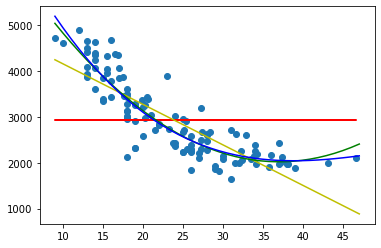

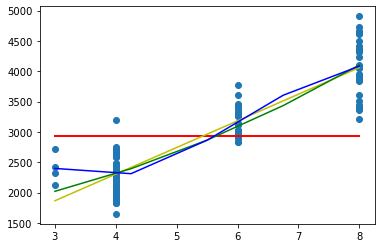

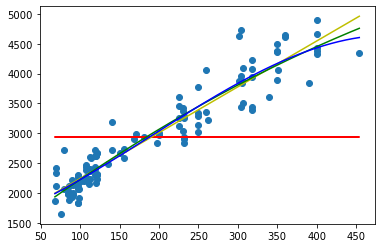

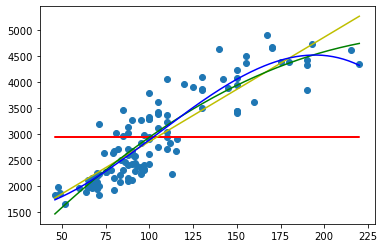

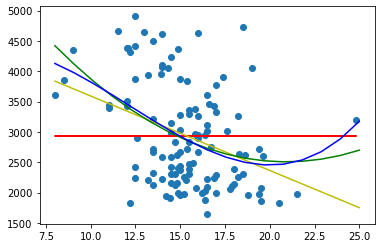

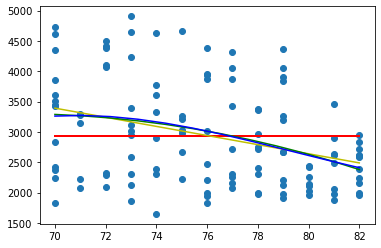

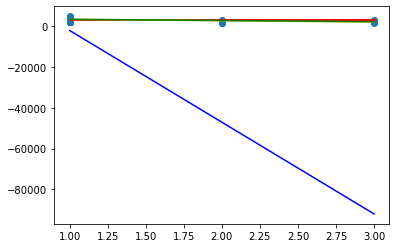

In [7]:
import matplotlib.pyplot as plt
import math

for i in x_test:
    # Plot datapoints on the graph.
    x = np.array(x_test[i])
    y = np.array(y_test)
    plt.scatter(x, y)

    # order = 0
    # Plot regression lines with degree 0.
    X = np.c_[np.ones(len(x))]
    w_0 = X.T@y@np.linalg.inv(X.T@X)
    fx = x
    fy = w_0[0]*X
    plt.plot(fx, fy, 'r')

    # order = 1
    # Plot regression lines with degree 1.
    X = np.c_[np.ones(len(x)), x]
    w_1 = X.T@y@np.linalg.inv(X.T@X)
    fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
    fy = w_1[0] + w_1[1]*fx
    plt.plot(fx, fy, 'y')

    # order = 2
    # Plot regression lines with degree 2.
    X = np.c_[np.ones(len(x)), x, np.square(x)]
    w_2 = X.T@y@np.linalg.inv(X.T@X)
    fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
    fy = w_2[0] + w_2[1]*fx + w_2[2]*np.square(fx)
    plt.plot(fx, fy, 'g')

    # order = 3
    # Plot regression lines with degree 3.
    X = np.c_[np.ones(len(x)), x, np.square(x), np.power(x, 3)]
    w_3 = X.T@y@np.linalg.inv(X.T@X)
    fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
    fy = w_3[0] + w_3[1]*fx + w_3[2]*np.square(fx) + w_3[3]*np.power(fx, 3)
    plt.plot(fx, fy, 'b')
    
    # output the plotted graph containing datapoints and four lines with degrees from 0 to 3.
    plt.show()

### Problem 1
### Part e

Part e is based on part d, but the dataset is split into 80% train set and 20% test set.
<br>
<br>
Comparing to the part d, there are fewer datapoints scattered across the graph.
<br>
In the first and the third graph, the lines are more fitted with datas.
<br>
This means we should find a balanced ratio to split our data, so we can better train and test our regression model.

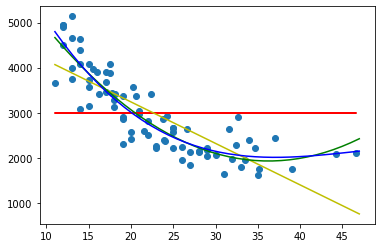

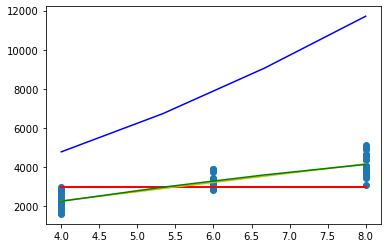

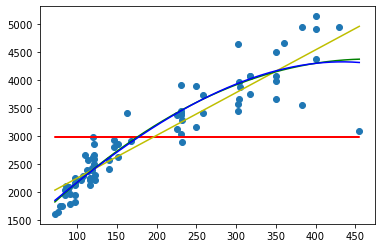

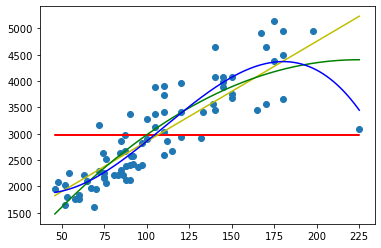

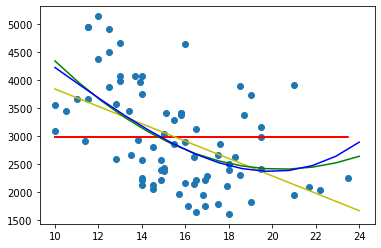

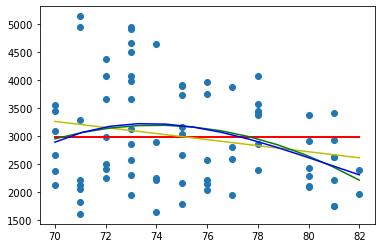

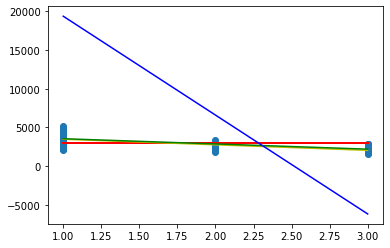

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X_var, Y_var, test_size=0.2)

for i in x_test:
    x = np.array(x_test[i])
    y = np.array(y_test)

    plt.scatter(x, y)

    X = np.c_[np.ones(len(x))]
    w_0 = X.T@y@np.linalg.inv(X.T@X)
    fx = x
    fy = w_0[0]*X
    plt.plot(fx, fy, 'r')

    X = np.c_[np.ones(len(x)), x]
    w_1 = X.T@y@np.linalg.inv(X.T@X)
    fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
    fy = w_1[0] + w_1[1]*fx
    plt.plot(fx, fy, 'y')

    X = np.c_[np.ones(len(x)), x, np.square(x)]
    w_2 = X.T@y@np.linalg.inv(X.T@X)
    fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
    fy = w_2[0] + w_2[1]*fx + w_2[2]*np.square(fx)
    plt.plot(fx, fy, 'g')

    X = np.c_[np.ones(len(x)), x, np.square(x), np.power(x, 3)]
    w_3 = X.T@y@np.linalg.inv(X.T@X)
    fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
    fy = w_3[0] + w_3[1]*fx + w_3[2]*np.square(fx) + w_3[3]*np.power(fx, 3)
    plt.plot(fx, fy, 'b')
    
    plt.show()

### Problem 2
### Part a

Using logical regression to predict weight classes (light/medium/heavy).
<br>
Firstly, normalize the numeric weight to categories (light/medium/heavy) according to bins from the last homework.
<br>
&emsp; Create a new feature column called 'weight_categ' append to the dataframe.
<br>
Then, import LinearRegression from sklearn. Build a logical regression model for each feature.
<br>
&emsp; Train the model with training set; test it with testing set.
<br>
The testing results of this logical regression model is not printed out because it is too long.
<br>
If you want to have a look at it, please print the y_pred variable.

In [9]:
# Reference: This part of code is used from week3's discussion by teaching assistant @Siyuan Yao.

min_wt = min(df['weight'])
max_wt = max(df['weight'])
per_bin = (max_wt - min_wt)/3

bin1_start = min(df['weight'])
bin1_end = bin1_start + per_bin
bin2_end = bin1_end + per_bin

def label_wt(row):
    if bin1_start <= row['weight'] and row['weight'] <= bin1_end:
        return 'light'
    elif row['weight'] <= bin2_end:
        return 'medium'
    else:
        return 'heavy'
df['weight_categ'] = df.apply(lambda row: label_wt(row),axis=1)

In [10]:
# Have a look at the new feature 'weight_categ' append to the dataframe.
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,weight_categ
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,medium
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,medium
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,medium
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,medium
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,medium


In [11]:
# Split the dataframe again
# The new dependent variable is 'weight_categ' now.
X_var = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin']]
Y_var = df['weight_categ']
x_train,x_test,y_train,y_test = train_test_split(X_var, Y_var, test_size=0.3)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# For each feature in test_set:
for i in x_test:
    log = LogisticRegression()
    # Train the logical regression model.
    log.fit(np.array(x_train[i]).reshape(-1, 1), y_train)
    # Test the model.
    y_pred = log.predict(np.array(x_test[i]).reshape(-1, 1))
    
    #print(y_pred)

### Problem 2
### Part b

Following part a, I use precision_score and recall_score imported from sklearn to see the precision and recall score.
<br>
These two scores are used to show how the classification of our model performs.
<br>
Both precision and recall are therefore based on relevance.
<br>
Therefore, a higher precision and recall score is more desirable.

In [13]:
from sklearn.metrics import precision_score, recall_score

# For each feature in test_set:
for i in x_test:
    log = LogisticRegression()
    # Train the logical regression model.
    log.fit(np.array(x_train[i]).reshape(-1, 1), y_train)
     # Test the model.
    y_pred = log.predict(np.array(x_test[i]).reshape(-1, 1))
    
    # Precision Score:
    ps = precision_score(y_test,y_pred,average='macro',zero_division=0)
    # Recall Score:
    rs = recall_score(y_test,y_pred,average='macro',zero_division=0)
    
    print("independent feature is:", i)
    print("    precision score is:", ps)
    print("    recall score is:", rs)

independent feature is: mpg
    precision score is: 0.7573283858998145
    recall score is: 0.714048381214798
independent feature is: cylinders
    precision score is: 0.840987355394135
    recall score is: 0.8533706119913017
independent feature is: displacement
    precision score is: 0.8207295436803633
    recall score is: 0.8114591352972162
independent feature is: horsepower
    precision score is: 0.7502488566047888
    recall score is: 0.7551697124410768
independent feature is: acceleration
    precision score is: 0.3645894001164822
    recall score is: 0.4580209895052474
independent feature is: model_year
    precision score is: 0.21636141636141637
    recall score is: 0.3278360819590205
independent feature is: origin
    precision score is: 0.44524959742351045
    recall score is: 0.5239204721963343


### Problem 3
### Part a

Problem 3 part a is based on problem 2. Min-max normalization is applied to the train and test set this time.
<br>
From what I built here, I don't see any regular changes comparing to the last part.
<br>
&emsp;For some features, both of their precision and recall score increase or decrease together.
<br>
&emsp;For some features, their precision and recall score just remain the same.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 

for i in x_test:
    X_train = scaler.fit_transform(np.array(x_train[i]).reshape(-1, 1))
    X_test = scaler.fit_transform(np.array(x_test[i]).reshape(-1, 1))
    
    log = LogisticRegression()
    log.fit(X_train, y_train)
    
    y_pred = log.predict(X_test)
    
    ps = precision_score(y_test,y_pred,average='macro',zero_division=0)
    rs = recall_score(y_test,y_pred,average='macro',zero_division=0)
    
    print("independent feature is:", i)
    print("    precision score is:", ps)
    print("    recall score is:", rs)

independent feature is: mpg
    precision score is: 0.6654761904761904
    recall score is: 0.6163877520699109
independent feature is: cylinders
    precision score is: 0.4931454318857253
    recall score is: 0.6101273687480585
independent feature is: displacement
    precision score is: 0.7271914132379248
    recall score is: 0.6632697164931048
independent feature is: horsepower
    precision score is: 0.6601792114695341
    recall score is: 0.5874089982036009
independent feature is: acceleration
    precision score is: 0.33797313797313794
    recall score is: 0.4202898550724638
independent feature is: model_year
    precision score is: 0.20833333333333334
    recall score is: 0.3305847076461769
independent feature is: origin
    precision score is: 0.44524959742351045
    recall score is: 0.5239204721963343


### Problem 4
### Part a

I am not sure if I understand this problem correctly. 
<br>
What I did was pick up two features train my linear regression model and predict 'mpg' by given values.
<br>
<br>
Because we are supposed to predict 'mpg' which are continuous values, so I use linear regression model to do this.
<br>
The formula I used here is: $b0 + b1*x1 + b2*x2 + b3*(x1)^2 + b4*(x2)^2$
<br>
&emsp; and I did not count residual error, since there is no specific requirement. I hope this is fine.

In [15]:
#origin=1, model_year=81, cylinders=4 , displacement=400, horsepower=150, weight=3500, acceleration=8.

pred_list = []

# Using 'acceleration' and 'origin' as features to predict 'mpg'.
x1 = 8
x2 = 1
X = np.array(df[['acceleration', 'origin']])
Y = np.array(df['mpg'])
X = np.c_[np.ones(len(X)), X, np.square(X)]
w = X.T@Y@np.linalg.inv(X.T@X)
pred = w[0] + w[1]*x1 + w[2]*x2 + w[3]*np.square(x1) + w[4]*np.square(x2)
pred_list.append(pred)
print("Terms are: 'acceleration' and 'origin'.")
print("    predicted 'mpg' is:", pred)
print(" ")

# Using 'weight' and 'model_year' as as features to predict 'mpg'.
x1 = 3500
x2 = 81
X = np.array(df[['weight', 'model_year']])
Y = np.array(df['mpg'])
X = np.c_[np.ones(len(X)), X, np.square(X)]
w = X.T@Y@np.linalg.inv(X.T@X)
pred = w[0] + w[1]*x1 + w[2]*x2 + w[3]*np.square(x1) + w[4]*np.square(x2)
pred_list.append(pred)
print("Terms are: 'weight' and 'model_year'.")
print("    predicted 'mpg' is:", pred)
print(" ")

# Using 'horsepower' and 'displacement' as features to predict 'mpg'.
x1 = 150
x2 = 400
X = np.array(df[['horsepower', 'displacement']])
Y = np.array(df['mpg'])
X = np.c_[np.ones(len(X)), X, np.square(X)]
w = X.T@Y@np.linalg.inv(X.T@X)
pred = w[0] + w[1]*x1 + w[2]*x2 + w[3]*np.square(x1) + w[4]*np.square(x2)
pred_list.append(pred)
print("Terms are: 'horsepower' and 'displacement'.")
print("    predicted 'mpg' is:", pred)
print(" ")

# Using 'cylinders' and 'horsepower' as features to predict 'mpg'.
x1 = 4
x2 = 150
X = np.array(df[['cylinders', 'horsepower']])
Y = np.array(df['mpg'])
X = np.c_[np.ones(len(X)), X, np.square(X)]
w = X.T@Y@np.linalg.inv(X.T@X)
pred = w[0] + w[1]*x1 + w[2]*x2 + w[3]*np.square(x1) + w[4]*np.square(x2)
pred_list.append(pred)
print("Terms are: 'cylinders' and 'horsepower'.")
print("    predicted 'mpg' is:", pred)
print(" ")

Terms are: 'acceleration' and 'origin'.
    predicted 'mpg' is: 11.424160868688332
 
Terms are: 'weight' and 'model_year'.
    predicted 'mpg' is: 23.408382710852948
 
Terms are: 'horsepower' and 'displacement'.
    predicted 'mpg' is: 15.259109161407661
 
Terms are: 'cylinders' and 'horsepower'.
    predicted 'mpg' is: 18.41040436161147
 


### Problem 4
### Part b

What I did here was using the 'mpg' values I got form last part to predict the corresponding 'weight_categ'.
<br>
Specific results are printed out below.

In [16]:
from sklearn.linear_model import LogisticRegression

X = np.array(df['mpg'])
Y = np.array(df['weight_categ'])

log = LogisticRegression()
log.fit(X.reshape(-1, 1), Y)

pred = log.predict(np.array(pred_list).reshape(-1, 1))


print("Terms are: 'acceleration' and 'origin'.")
print("    predicted 'mpg' is:", pred_list[0])
print("        corresponding weight category is:", pred[0])
print("")

print("Terms are: 'weight' and 'model_year'.")
print("    predicted 'mpg' is:", pred_list[1])
print("        corresponding weight category is:", pred[1])
print(" ")

print("Terms are: 'horsepower' and 'displacement'.")
print("    predicted 'mpg' is:", pred_list[2])
print("        corresponding weight category is:", pred[2])
print(" ")

print("Terms are: 'cylinders' and 'horsepower'.")
print("    predicted 'mpg' is:", pred_list[3])
print("        corresponding weight category is:", pred[3])
print(" ")

Terms are: 'acceleration' and 'origin'.
    predicted 'mpg' is: 11.424160868688332
        corresponding weight category is: heavy

Terms are: 'weight' and 'model_year'.
    predicted 'mpg' is: 23.408382710852948
        corresponding weight category is: light
 
Terms are: 'horsepower' and 'displacement'.
    predicted 'mpg' is: 15.259109161407661
        corresponding weight category is: medium
 
Terms are: 'cylinders' and 'horsepower'.
    predicted 'mpg' is: 18.41040436161147
        corresponding weight category is: medium
 
